[[  -14]
 [  -18]
 [  -18]
 [  -12]
 [    1]
 [   20]
 [   48]
 [   85]
 [  127]
 [  175]
 [  228]
 [  284]
 [  347]
 [  410]
 [  476]
 [  543]
 [  612]
 [  683]
 [  756]
 [  832]
 [  908]
 [  981]
 [ 1052]
 [ 1119]
 [ 1182]
 [ 1239]
 [ 1285]
 [ 1324]
 [ 1356]
 [ 1377]
 [ 1388]
 [ 1388]
 [ 1376]
 [ 1351]
 [ 1313]
 [ 1260]
 [ 1193]
 [ 1115]
 [ 1021]
 [  913]
 [  793]
 [  659]
 [  515]
 [  359]
 [  194]
 [   18]
 [ -166]
 [ -358]
 [ -554]
 [ -753]
 [ -957]
 [-1163]
 [-1367]
 [-1573]
 [-1776]
 [-1971]
 [-2161]
 [-2342]
 [-2515]
 [-2678]
 [-2823]
 [-2955]
 [-3072]
 [-3173]
 [-3258]
 [-3323]
 [-3373]
 [-3404]
 [-3415]
 [-3407]
 [-3380]
 [-3335]
 [-3270]
 [-3185]
 [-3083]
 [-2964]
 [-2830]
 [-2681]
 [-2519]
 [-2347]
 [-2164]
 [-1971]
 [-1770]
 [-1560]
 [-1346]
 [-1131]
 [ -911]
 [ -687]
 [ -462]
 [ -239]
 [  -22]
 [  189]
 [  395]
 [  595]
 [  790]
 [  977]
 [ 1153]
 [ 1320]
 [ 1479]
 [ 1628]
 [ 1766]
 [ 1895]
 [ 2014]
 [ 2122]
 [ 2219]
 [ 2303]
 [ 2372]
 [ 2431]
 [ 2482]
 [ 2524]
 [ 2557]
 

c:\users\trojan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


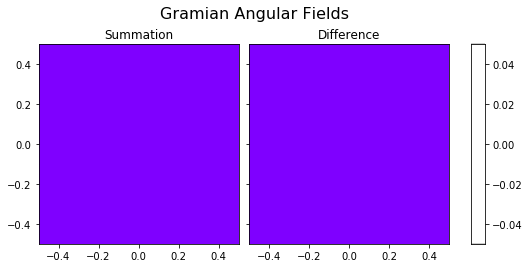

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
import pandas as pd
import numpy as np


# Parameters
#X, _, _, _ = load_gunpoint(return_X_y=True)
data = pd.read_csv("D:/LAB Project Data/1D signal stuff/airforce/Data051116_163928_oven/1D_new/nodefect/point(50,177).csv")
X = np.asarray(data)
print (X)
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=1, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=1, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()